Assignment 4 \
Part 2: Brain Cancer Binary Classification \
Submitted by Group 5 \

Groupmembers:

1. Sajan Kumer Sarker (2111131642) (sajan.sarker@northsouth.edu)
2. Rafsan Jani Chowdhury (2011424642) (rafsan.chowdhury@northsouth.edu)
3. Rosely Mohammad (2014219642) (rosely.mohammad@northsouth.edu)

Task: \
1) Experiment with Decision Trees and XGBoost

2) Understanding of Evaluation metrics



**For Binary Classification problem: Accuracy, Confusion matrix, Precision, Recall, F-score, and Precision-Recall curve**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor

In [4]:
df = pd.read_csv('/content/drive/MyDrive/CSE445-Assignment/Assignment-4/dataset/DT-BrainCancer.csv')
print(df.shape)
print(df.head())

(88, 7)
   Unnamed: 0     sex   diagnosis             loc  ki    gtv  status
0           1  Female  Meningioma  Infratentorial  90   6.11       0
1           2    Male   HG glioma  Supratentorial  90  19.35       1
2           3  Female  Meningioma  Infratentorial  70   7.95       0
3           4  Female   LG glioma  Supratentorial  80   7.61       1
4           5    Male   HG glioma  Supratentorial  90   5.06       1


In [5]:
print('Number of missing values: ')
print(df.isnull().sum())

Number of missing values: 
Unnamed: 0    0
sex           0
diagnosis     1
loc           0
ki            0
gtv           0
status        0
dtype: int64


In [6]:
df = df.drop(columns=['Unnamed: 0', 'sex'])
df = df.dropna()
print(df.shape)
print(df.head())

(87, 5)
    diagnosis             loc  ki    gtv  status
0  Meningioma  Infratentorial  90   6.11       0
1   HG glioma  Supratentorial  90  19.35       1
2  Meningioma  Infratentorial  70   7.95       0
3   LG glioma  Supratentorial  80   7.61       1
4   HG glioma  Supratentorial  90   5.06       1


In [7]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df['loc'] = le.fit_transform(df['loc'])
print(df.head(), df.tail())

   diagnosis  loc  ki    gtv  status
0          2    0  90   6.11       0
1          0    1  90  19.35       1
2          2    0  70   7.95       0
3          1    1  80   7.61       1
4          0    1  90   5.06       1     diagnosis  loc  ki    gtv  status
83          0    1  80   0.16       1
84          0    1  80  19.81       1
85          2    1  90   2.50       0
86          2    1  90   2.02       0
87          3    0  80   0.11       0


In [8]:
X = df.drop(columns=['status'])
y = df['status']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Train Data Shape (X, y): {X_train.shape, y_train.shape}')
print(f'Validation Data Shape (X, y): {X_val.shape, y_val.shape}')
print(f'Test Data Shape (X, y): {X_test.shape, y_test.shape}')

Train Data Shape (X, y): ((60, 4), (60,))
Validation Data Shape (X, y): ((13, 4), (13,))
Test Data Shape (X, y): ((14, 4), (14,))


In [9]:
# initialize the classifier models
dt_classifier = DecisionTreeClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# initialize hyperparameters for gridsearchCV
dt_param_grid = {
    'max_depth': [2,3,4,5,8,10,12,15],
    'min_samples_split': [1,2,4,5,10],
    'min_samples_leaf': [3,5,10,12,15,16]
}

xgb_param_grid = {
    'max_depth': [3,5,7,10,12],
    'learning_rate': [0.1,0.01,0.001],
    'n_estimators': [50,100,150,200,300],
    'subsample': [0.8,1.0]
}

In [10]:
# Decision Tree:
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_
print(f"Decision Tree Best Parameters: {dt_best_params}")
print(f"Decision Tree Best Score: {dt_best_score}")

Decision Tree Best Parameters: {'max_depth': 2, 'min_samples_leaf': 16, 'min_samples_split': 2}
Decision Tree Best Score: 0.6666666666666667


In [11]:
# XGBoost:
xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = xgb_grid_search.best_score_
print(f"XGBoost Best Parameters: {xgb_best_params}")
print(f"XGBoost Best Score: {xgb_best_score}")

XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
XGBoost Best Score: 0.65


In [12]:
# now retrain the model on the combined training and validation set with the best hyperparameters
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

dt_final_model = DecisionTreeClassifier(**dt_best_params, random_state=42)
xgb_final_model = XGBClassifier(**xgb_best_params, random_state=42)

In [13]:
# retrain decision tree final model
dt_final_model.fit(X_train_val, y_train_val)
print(f"Decision Tree Best Score: {xgb_best_score}")

Decision Tree Best Score: 0.65


In [14]:
# retrain xgboost final model
xgb_final_model.fit(X_train_val, y_train_val)
print(f"XGBoost Score: {xgb_best_score}")

XGBoost Score: 0.65


In [15]:
# evaluate the final model on test set
y_test_pred_dt = dt_final_model.predict(X_test)
y_test_pred_xgb = xgb_final_model.predict(X_test)

In [16]:
# functions to calculate: accuracy, average precision, average recall, average f-score.

# Accuracy
def accuracy_score(y_actual, y_predict):
  correct = 0
  total_samples = len(y_actual)

  for predict, actual in zip(y_predict, y_actual):
    if predict == actual:
      correct += 1

  return (correct/ total_samples)

# Precision
def precision_score(y_actual, y_predict):
  precision_scores = []

  for class_label in set(y_actual):
    true_positive = 0
    false_positive = 0

    for actual, predict in zip(y_actual, y_predict):
      if predict == class_label:
        if actual == class_label:
          true_positive += 1
        else:
          false_positive += 1

    if true_positive+false_positive ==0:
      class_precision = 0.0
    else:
      class_precision = true_positive / (true_positive + false_positive)
    precision_scores.append(class_precision)
  return precision_scores

# average precision
def average_precision_score_macro(precision_score, y_actual):
  return sum(precision_score)/len(set(y_actual))

# recall
def recall_score(y_actual, y_predict):
  recall_scores = []

  for class_label in set(y_actual):
    true_positive = 0
    false_negative = 0

    for actual, predict in zip(y_actual, y_predict):
      if actual == class_label:
        if predict == class_label:
          true_positive += 1
        else:
          false_negative += 1

    if true_positive+false_negative ==0:
      class_recall = 0.0
    else:
      class_recall = true_positive / (true_positive + false_negative)

    recall_scores.append(class_recall)
  return recall_scores

# average recall
def average_recall_score_macro(recall_score, y_actual):
  return sum(recall_score)/len(set(y_actual))

# f-score
def fscore(y_actual,y_predict):
  f_score_total = []

  for class_label in set(y_actual):
    true_positive = 0
    false_positive = 0
    false_negative = 0

    for actual, predict in zip(y_actual, y_predict):
      if predict == class_label:
        if actual == class_label:
          true_positive += 1
        else:
          false_positive += 1
      elif actual == class_label:
        false_negative += 1

    if true_positive + false_positive == 0:
      precision = 0.0
    else:
      precision = true_positive/(true_positive+false_positive)

    if true_positive + false_negative == 0:
      precision = 0.0
    else:
      recall = true_positive/(true_positive+false_negative)

    if precision + recall ==0:
      f_score = 0.0
    else:
      f_score = 2*true_positive/((2*true_positive)+false_positive+false_negative)

    f_score_total.append(f_score)
  return f_score_total

# fscore average
def fscore_average_macro(fscore, y_actual):
  return sum(fscore)/len(set(y_actual))

In [17]:
print("Decision Tree: ")
print(f'Accuracy: {accuracy_score(y_test, y_test_pred_dt)}')
print(f'Precision: {precision_score(y_test, y_test_pred_dt)}')
print(f'Recall: {recall_score(y_test, y_test_pred_dt)}')
print(f'F1-Score: {fscore(y_test, y_test_pred_dt)}')
print()

print("XGBoost: ")
print(f'Accuracy: {accuracy_score(y_test, y_test_pred_xgb)}')
print(f'Precision: {precision_score(y_test, y_test_pred_xgb)}')
print(f'Recall: {recall_score(y_test, y_test_pred_xgb)}')
print(f'F1-Score: {fscore(y_test, y_test_pred_xgb)}')

Decision Tree: 
Accuracy: 0.7857142857142857
Precision: [0.75, 1.0]
Recall: [1.0, 0.4]
F1-Score: [0.8571428571428571, 0.5714285714285714]

XGBoost: 
Accuracy: 0.9285714285714286
Precision: [1.0, 0.8333333333333334]
Recall: [0.8888888888888888, 1.0]
F1-Score: [0.9411764705882353, 0.9090909090909091]


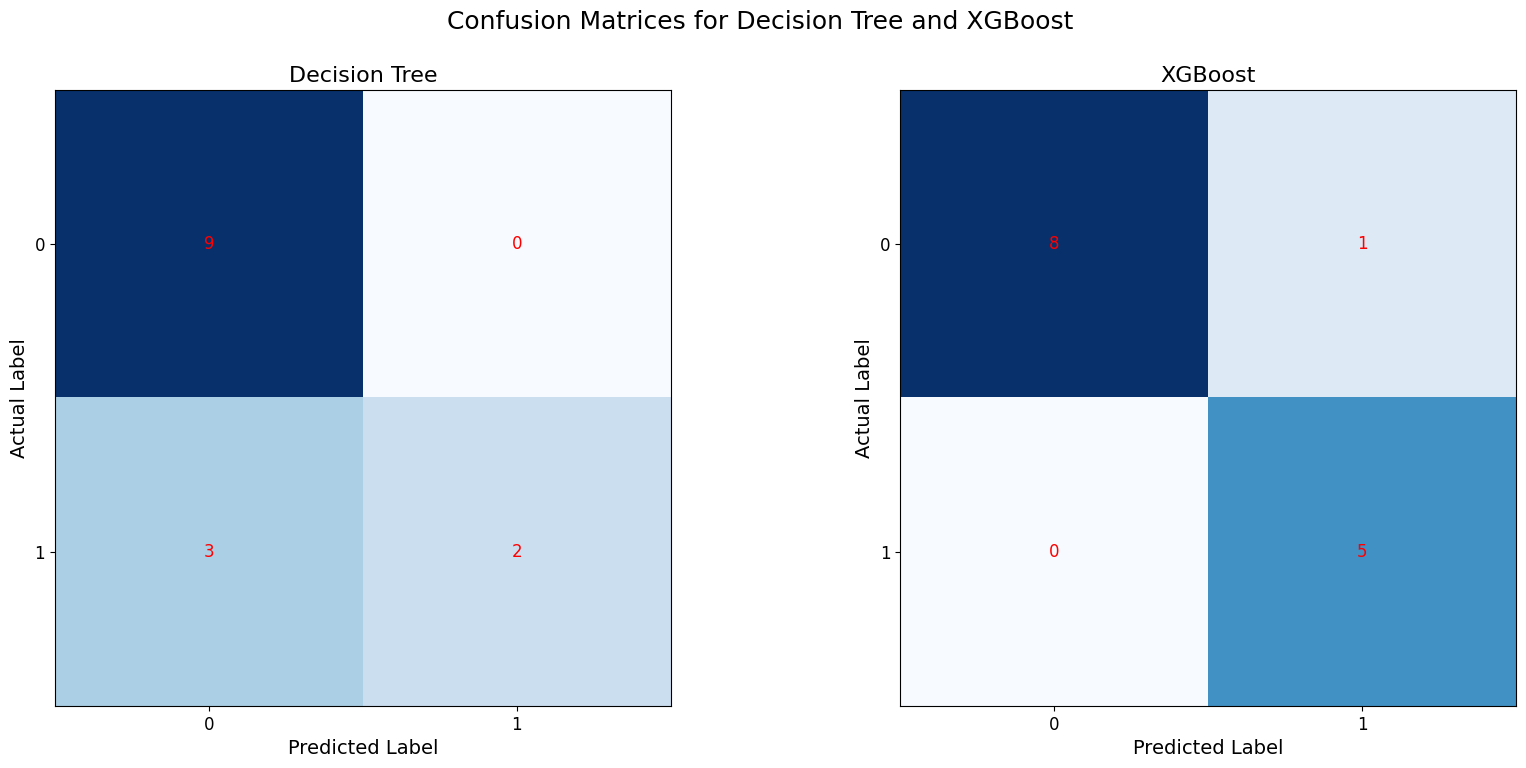

In [18]:
num_class = len(set(y_test))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# confusion matrix for Decision Tree
conf_matrix_dt = np.zeros((num_class, num_class), dtype=int)
for actual, predict in zip(y_test, y_test_pred_dt):
    conf_matrix_dt[actual, predict] += 1

# plotting
ax1.imshow(conf_matrix_dt, cmap='Blues', interpolation='nearest')
ax1.set_title('Decision Tree', fontsize=16)
ax1.set_xlabel('Predicted Label', fontsize=14)
ax1.set_ylabel('Actual Label', fontsize=14)

for i in range(num_class):
    for j in range(num_class):
        ax1.text(j, i, str(conf_matrix_dt[i, j]), ha='center', va='center', color='red', fontsize=12)

# confusion matrix for XGBoost
conf_matrix_xgb = np.zeros((num_class, num_class), dtype=int)
for actual, predict in zip(y_test, y_test_pred_xgb):
    conf_matrix_xgb[actual, predict] += 1

# Plotting
ax2.imshow(conf_matrix_xgb, cmap='Blues', interpolation='nearest')
ax2.set_title('XGBoost', fontsize=16)
ax2.set_xlabel('Predicted Label', fontsize=14)
ax2.set_ylabel('Actual Label', fontsize=14)

for i in range(num_class):
    for j in range(num_class):
        ax2.text(j, i, str(conf_matrix_xgb[i, j]), ha='center', va='center', color='red', fontsize=12)

# common properties
for ax in (ax1, ax2):
    ax.set_xticks(np.arange(num_class))
    ax.set_yticks(np.arange(num_class))
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.suptitle('Confusion Matrices for Decision Tree and XGBoost', fontsize=18)
plt.show()

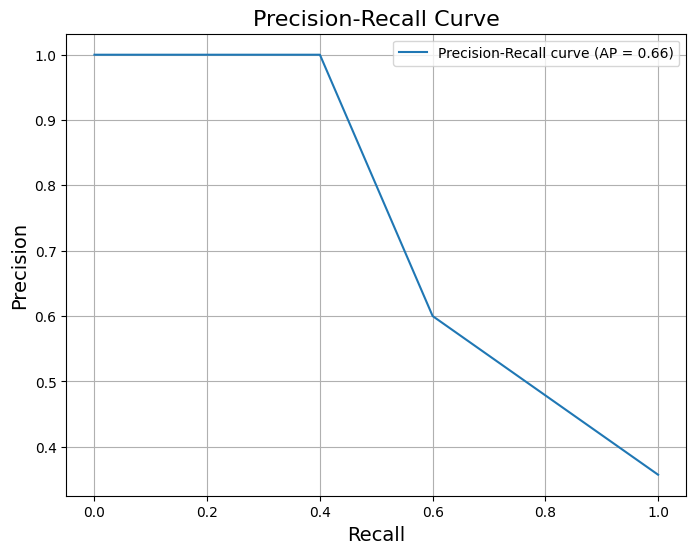

In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score
y_scores = dt_final_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='best')
plt.grid()
plt.show()

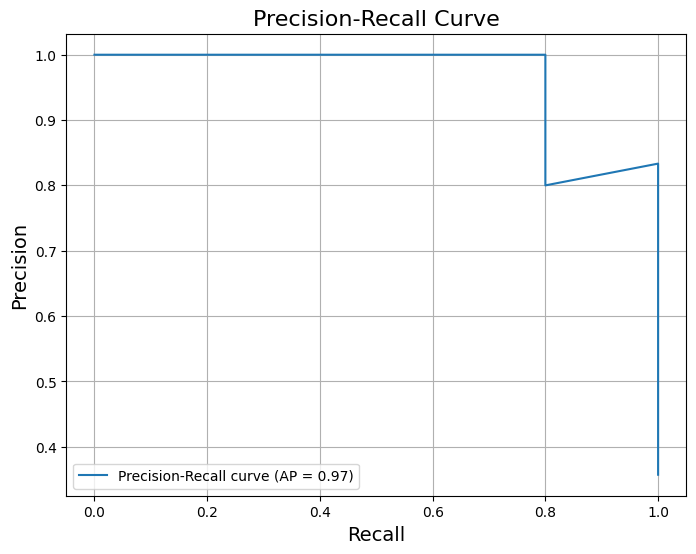

In [20]:
y_scores = xgb_final_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='best')
plt.grid()
plt.show()